# ДЗ 10. Библиотека Pandas

### 1. Предобработка данных

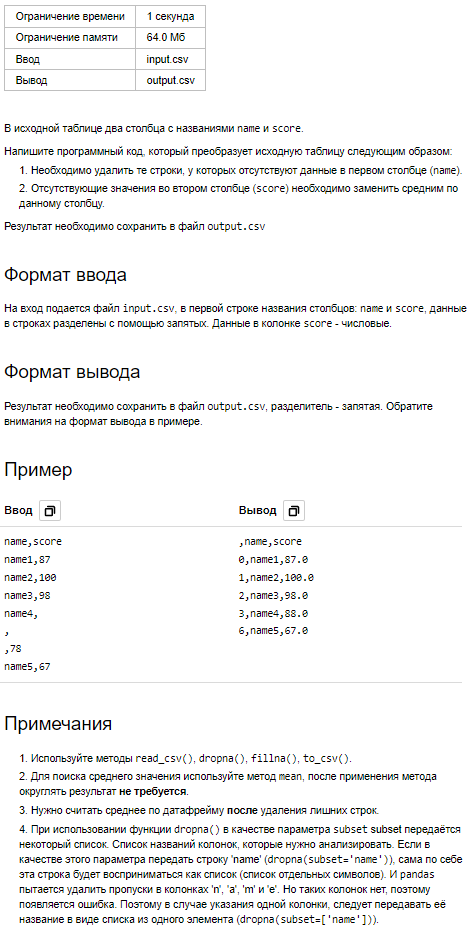

In [ ]:
import pandas as pd


df = pd.read_csv('input.csv')
df.dropna(subset=['name'], inplace=True)
df.fillna(df.score.mean()).to_csv('output.csv')

### 2. Температура

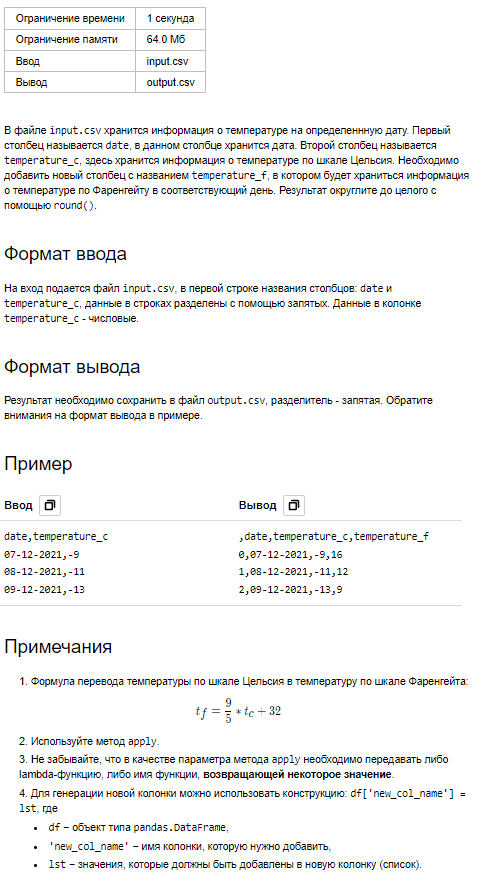

In [143]:
import pandas as pd


df = pd.read_csv('input.csv')
df['temperature_f'] = df.temperature_c.apply(lambda x: round(x*(9/5) + 32))
df.to_csv('output.csv')

### 3. Метод loc

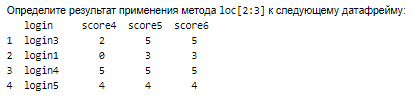

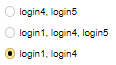

### 4. Водители склада

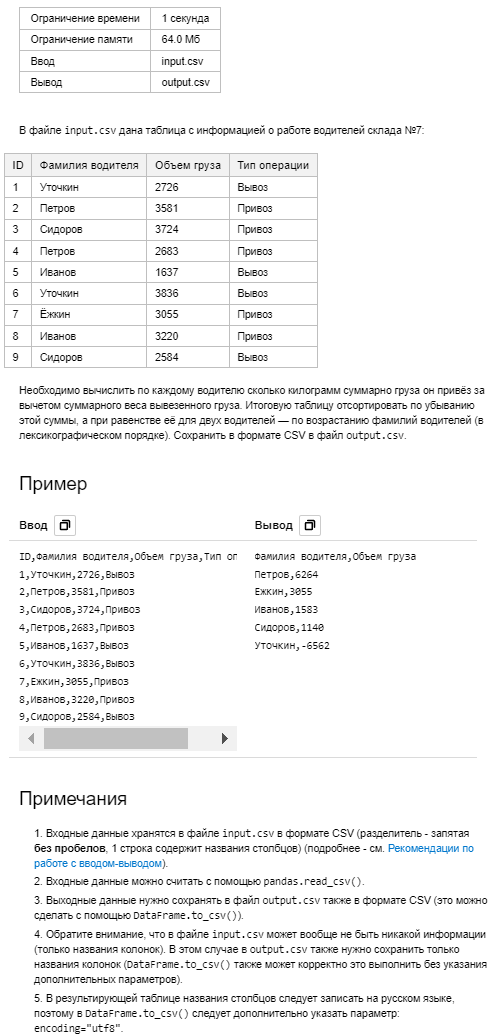

In [ ]:
import pandas as pd


df = pd.read_csv('input.csv')
income = df.loc[df['Тип операции'] == 'Вывоз'].groupby('Фамилия водителя', as_index=False).agg({'Объем груза':'sum'})
outcome = df.loc[df['Тип операции'] == 'Привоз'].groupby('Фамилия водителя', as_index=False).agg({'Объем груза':'sum'})
df = outcome.merge(income, on='Фамилия водителя', how='outer').fillna(0)
df['Объем груза'] = (df['Объем груза_x'] - df['Объем груза_y']).astype(int)
df.drop(['Объем груза_x', 'Объем груза_y'], axis=1, inplace=True)
df = df.sort_values('Объем груза', ascending=False)
df.to_csv('output.csv', index = False, encoding="utf8")

### 5. Лёгкий подъём

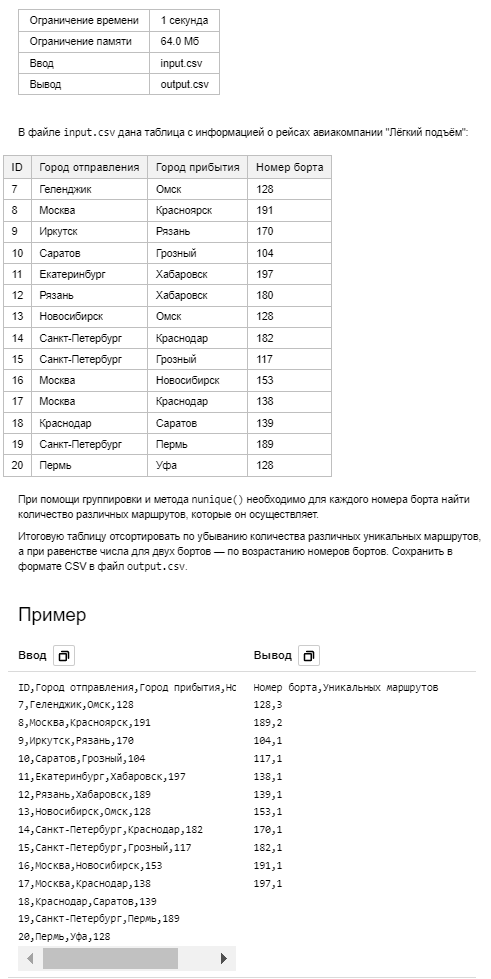

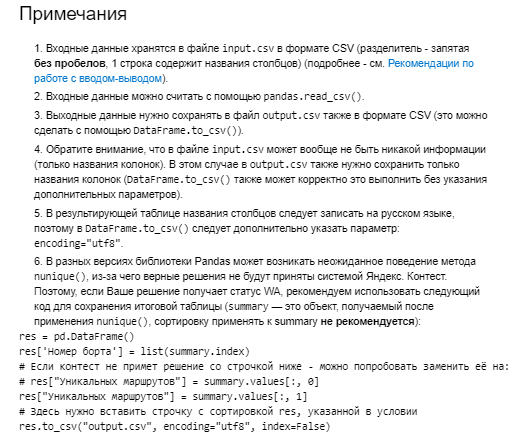

In [536]:
import pandas as pd


df = pd.read_csv('input.csv')
df = df.groupby(['Номер борта', 'Город отправления', 'Город прибытия'], as_index=False).agg({'ID': 'count'}).groupby('Номер борта', as_index=False).agg({'ID':'count'}).rename(columns={'ID': 'Уникальных маршрутов'}).sort_values(['Уникальных маршрутов', 'Номер борта'], ascending=[False, True])
df.to_csv('output.csv', encoding="utf8", index=False)

### 6. Метод merge

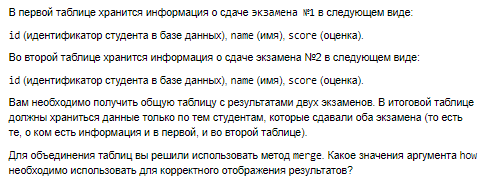

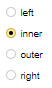